In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_curve
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from autogluon.tabular import TabularDataset, TabularPredictor


In [89]:
# Read Data 
df = pd.read_csv(r"C:\Users\HIT\Desktop\jiya0627-1.csv", encoding='gbk')

In [90]:
# Data Preprocessing
del df["Year"]

In [91]:
# All the features that contains 'Feature' Name
cols = [col for col in df.columns if 'Feature' in col]

In [92]:
sdf = df[cols]

In [93]:
#fill with values if its null
sdf = sdf.bfill()

In [94]:
# PCA For feature deduction (Apply on sdf)
def perform_pca(df, n_components=2):
    # Standardize the data
    scaler = StandardScaler()
    df_scaled = scaler.fit_transform(df)
    
    # Apply PCA
    pca = PCA(n_components=n_components)
    principal_components = pca.fit_transform(df_scaled)
    
    # Create a DataFrame with the principal components
    columns = [f'PC{i+1}' for i in range(n_components)]
    df_pca = pd.DataFrame(data=principal_components, columns=columns)
    
    # Get the explained variance
    explained_variance = pca.explained_variance_ratio_
    
    return df_pca, explained_variance

In [95]:
import pandas as pd

# Assuming sdf is your DataFrame
print(sdf.isnull().sum())
sdf_cleaned = sdf.dropna()

# Fill with the mean of each column
sdf_filled = sdf.fillna(sdf.mean())

# Alternatively, fill with median
# sdf_filled = sdf.fillna(sdf.median())

# Or fill with a constant value
# sdf_filled = sdf.fillna(0)

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scaled = scaler.fit_transform(sdf_filled)

Feature-1      0
Feature-2      0
Feature-3      0
Feature-4      0
Feature-5      0
              ..
Feature-196    0
Feature-197    0
Feature-198    0
Feature-199    0
Feature-200    0
Length: 200, dtype: int64


In [96]:
from sklearn.decomposition import PCA

def perform_pca(data, n_components):
    # Apply PCA
    pca = PCA(n_components=n_components)
    principal_components = pca.fit_transform(data)

    # Create a DataFrame with the principal components
    columns = [f'PC{i+1}' for i in range(n_components)]
    df_pca = pd.DataFrame(data=principal_components, columns=columns)

    # Explained variance
    explained_variance = pca.explained_variance_ratio_

    return df_pca, explained_variance

# Assuming sdf_filled is your cleaned data
df_pca, explained_variance = perform_pca(df_scaled, n_components=7)

In [97]:
df_pca

,PC1,PC2,PC3,PC4,PC5,PC6,PC7
0,0.471566,0.712023,0.301072,0.430960,-1.518628,-2.474104,-1.408784
1,0.471566,0.712023,0.301072,0.430960,-1.518628,-2.474104,-1.408784
2,-0.627186,0.623149,-1.048749,0.238414,0.711505,-1.671507,3.152055
3,-0.627186,0.623149,-1.048749,0.238414,0.711505,-1.671507,3.152055
4,0.455044,-1.946447,-0.710262,1.613657,-0.437353,-0.807928,-2.204816
...,...,...,...,...,...,...,...
620,0.569067,2.895758,-0.008128,-0.001721,0.067113,-0.512025,1.397858
621,-0.943447,-0.874318,1.405124,1.578980,-2.471060,-2.159657,-1.643779
622,0.400175,0.618769,2.004043,1.080518,0.013032,-1.721047,-0.598809
623,0.400175,0.618769,2.004043,1.080518,0.013032,-1.721047,-0.598809


In [98]:
# All the remaining features with 'Feature'
scols = [col for col in df.columns if col not in cols]
ndf = df[scols]

In [99]:
ndf

,ETL,ETL-2,Perovskite,Perovskite_deposition_procedure,Perovskite_deposition_method,Antisolvent,Precursor_solution,HTL,HTL_additive,PCEbest,...,MA,FA,Rb,Pb,Sn,I,Br,Cl,T95,test_type
0,ICBA,Bphen,FA0.75MA0.25SnBrI2,one-step,spin,diethylether,DMF+DMSO,PEDOT:PSS,0,10.23,...,0.25,0.75,0.0,0.0,1.0,0.666667,0.333333,0.0,12540.00,D-1
1,ICBA,Bphen,FA0.75MA0.25SnBrI2,one-step,spin,diethylether,DMF+DMSO,PEDOT:PSS,0,10.23,...,0.25,0.75,0.0,0.0,1.0,0.666667,0.333333,0.0,9714.00,D-1
2,ICBA,Bphen,FA0.75MA0.25SnBrI2,one-step,spin,diethylether,DMF+DMSO,PEDOT:PSS,0,11.17,...,0.25,0.75,0.0,0.0,1.0,0.666667,0.333333,0.0,12540.00,D-1
3,ICBA,Bphen,FA0.75MA0.25SnBrI2,one-step,spin,diethylether,DMF+DMSO,PEDOT:PSS,0,11.17,...,0.25,0.75,0.0,0.0,1.0,0.666667,0.333333,0.0,9714.00,D-1
4,b-TiO2,m-TiO2,MAPbI3,one-step,spin,chlorobenzene,DMF+DMSO,NiOx,0,12.70,...,1.00,0.00,0.0,1.0,0.0,1.000000,0.000000,0.0,23040.00,D-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
620,TiO2,0,MAPbI3,two-step,spin2-3-dip,no,DMSO,spiro-OMeTAD,Li+TBP,16.40,...,1.00,0.00,0.0,1.0,0.0,1.000000,0.000000,0.0,216.60,D-1
621,C60,BCP,MAPbI3,one-step,spin,no,DMF,CuSCN,0,16.60,...,1.00,0.00,0.0,1.0,0.0,1.000000,0.000000,0.0,70.00,D-1
622,TiO2,0,MAPbI3,two-step,vasp,no,DMF,spiro-OMeTAD,Li+TBP,16.80,...,1.00,0.00,0.0,1.0,0.0,1.000000,0.000000,0.0,70.00,D-2
623,TiO2,0,MAPbI3,two-step,vasp,no,DMF,spiro-OMeTAD,Li+TBP,16.80,...,1.00,0.00,0.0,1.0,0.0,1.000000,0.000000,0.0,0.03,D-1


In [100]:
# Now we combine the selected feature from PCA and to the features without name contains 'Feature'
df1 = pd.concat((df_pca, ndf), axis=1)

In [101]:
df1

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,ETL,ETL-2,Perovskite,...,MA,FA,Rb,Pb,Sn,I,Br,Cl,T95,test_type
0,0.471566,0.712023,0.301072,0.430960,-1.518628,-2.474104,-1.408784,ICBA,Bphen,FA0.75MA0.25SnBrI2,...,0.25,0.75,0.0,0.0,1.0,0.666667,0.333333,0.0,12540.00,D-1
1,0.471566,0.712023,0.301072,0.430960,-1.518628,-2.474104,-1.408784,ICBA,Bphen,FA0.75MA0.25SnBrI2,...,0.25,0.75,0.0,0.0,1.0,0.666667,0.333333,0.0,9714.00,D-1
2,-0.627186,0.623149,-1.048749,0.238414,0.711505,-1.671507,3.152055,ICBA,Bphen,FA0.75MA0.25SnBrI2,...,0.25,0.75,0.0,0.0,1.0,0.666667,0.333333,0.0,12540.00,D-1
3,-0.627186,0.623149,-1.048749,0.238414,0.711505,-1.671507,3.152055,ICBA,Bphen,FA0.75MA0.25SnBrI2,...,0.25,0.75,0.0,0.0,1.0,0.666667,0.333333,0.0,9714.00,D-1
4,0.455044,-1.946447,-0.710262,1.613657,-0.437353,-0.807928,-2.204816,b-TiO2,m-TiO2,MAPbI3,...,1.00,0.00,0.0,1.0,0.0,1.000000,0.000000,0.0,23040.00,D-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
620,0.569067,2.895758,-0.008128,-0.001721,0.067113,-0.512025,1.397858,TiO2,0,MAPbI3,...,1.00,0.00,0.0,1.0,0.0,1.000000,0.000000,0.0,216.60,D-1
621,-0.943447,-0.874318,1.405124,1.578980,-2.471060,-2.159657,-1.643779,C60,BCP,MAPbI3,...,1.00,0.00,0.0,1.0,0.0,1.000000,0.000000,0.0,70.00,D-1
622,0.400175,0.618769,2.004043,1.080518,0.013032,-1.721047,-0.598809,TiO2,0,MAPbI3,...,1.00,0.00,0.0,1.0,0.0,1.000000,0.000000,0.0,70.00,D-2
623,0.400175,0.618769,2.004043,1.080518,0.013032,-1.721047,-0.598809,TiO2,0,MAPbI3,...,1.00,0.00,0.0,1.0,0.0,1.000000,0.000000,0.0,0.03,D-1


In [102]:
df = df1

In [103]:
# For the taking logs of T95
def logarize(x):
    if x is not None:
        try:
            val = np.log1p(float(x))
            return val
        except Exception as e:
            print(e)
            return None
    else:
        return None

In [104]:
df["LogT95"] = df['T95'].apply(lambda x: logarize(x))

c:\Users\HIT\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


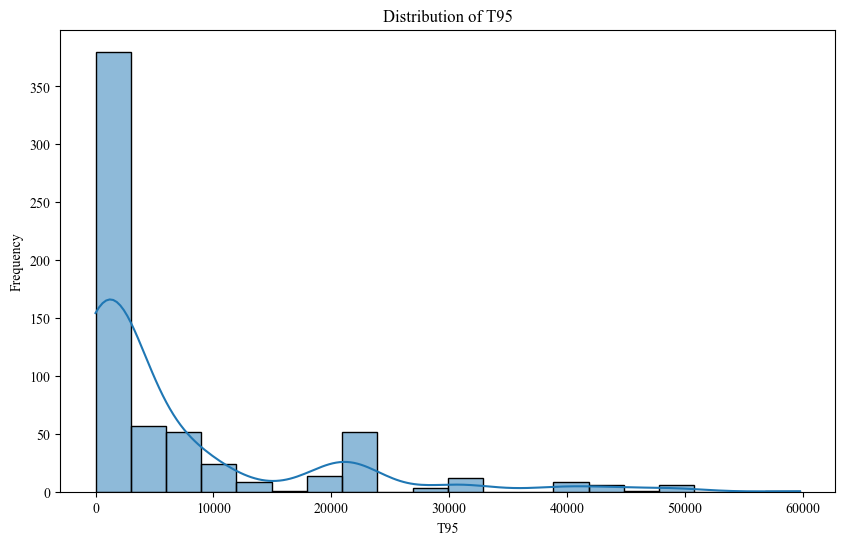

In [105]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram of 'stability'
plt.figure(figsize=(10, 6))
sns.histplot(df['T95'], bins=20, kde=True)
plt.title('Distribution of T95')
plt.xlabel('T95')
plt.ylabel('Frequency')
plt.savefig('t95_distribution.png', dpi=300, bbox_inches='tight')

plt.show()

c:\Users\HIT\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


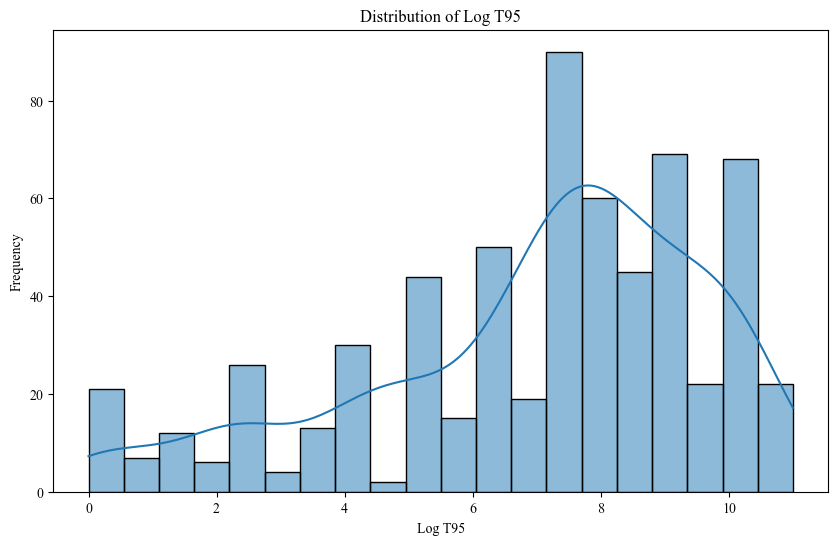

In [106]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram of 'stability'
plt.figure(figsize=(10, 6))
sns.histplot(df['LogT95'], bins=20, kde=True)
plt.title('Distribution of Log T95')
plt.xlabel('Log T95')
plt.ylabel('Frequency')
plt.show()

In [107]:
# For classification task 
def categorize_stability_adjusted(T95):
    if T95 < 50:
        return 0  # Very unstable
    elif 50 <= T95 < 300:
        return 1  # Unstable
    elif 300 <= T95 < 800:
        return 2  # Moderately stable
    elif 800 <= T95 < 1500:
        return 3  # Stable
    else:
        return 4  # Very stable

In [108]:
df['label_adjusted'] = df['T95'].apply(categorize_stability_adjusted)

In [109]:
# Define target variable
df['label_adjusted'] = df['T95'].apply(lambda x: 1 if x < 500 else 2 if x < 1800 else 3 if x < 3000 else 4)

In [110]:
# df['label_adjusted'].plot(kind="hist")

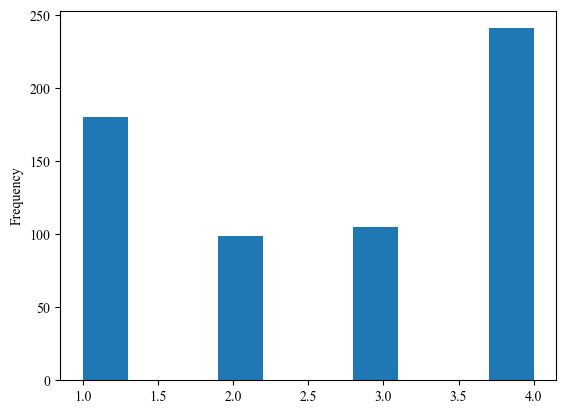

In [111]:
# Plot the histogram
df['label_adjusted'].plot(kind="hist")

# Save the plot
plt.savefig('label_adjusted_histogram.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

In [112]:
df1 = df.drop(columns=["LogT95", "T95"])

In [113]:
df1

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,ETL,ETL-2,Perovskite,...,MA,FA,Rb,Pb,Sn,I,Br,Cl,test_type,label_adjusted
0,0.471566,0.712023,0.301072,0.430960,-1.518628,-2.474104,-1.408784,ICBA,Bphen,FA0.75MA0.25SnBrI2,...,0.25,0.75,0.0,0.0,1.0,0.666667,0.333333,0.0,D-1,4
1,0.471566,0.712023,0.301072,0.430960,-1.518628,-2.474104,-1.408784,ICBA,Bphen,FA0.75MA0.25SnBrI2,...,0.25,0.75,0.0,0.0,1.0,0.666667,0.333333,0.0,D-1,4
2,-0.627186,0.623149,-1.048749,0.238414,0.711505,-1.671507,3.152055,ICBA,Bphen,FA0.75MA0.25SnBrI2,...,0.25,0.75,0.0,0.0,1.0,0.666667,0.333333,0.0,D-1,4
3,-0.627186,0.623149,-1.048749,0.238414,0.711505,-1.671507,3.152055,ICBA,Bphen,FA0.75MA0.25SnBrI2,...,0.25,0.75,0.0,0.0,1.0,0.666667,0.333333,0.0,D-1,4
4,0.455044,-1.946447,-0.710262,1.613657,-0.437353,-0.807928,-2.204816,b-TiO2,m-TiO2,MAPbI3,...,1.00,0.00,0.0,1.0,0.0,1.000000,0.000000,0.0,D-1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
620,0.569067,2.895758,-0.008128,-0.001721,0.067113,-0.512025,1.397858,TiO2,0,MAPbI3,...,1.00,0.00,0.0,1.0,0.0,1.000000,0.000000,0.0,D-1,1
621,-0.943447,-0.874318,1.405124,1.578980,-2.471060,-2.159657,-1.643779,C60,BCP,MAPbI3,...,1.00,0.00,0.0,1.0,0.0,1.000000,0.000000,0.0,D-1,1
622,0.400175,0.618769,2.004043,1.080518,0.013032,-1.721047,-0.598809,TiO2,0,MAPbI3,...,1.00,0.00,0.0,1.0,0.0,1.000000,0.000000,0.0,D-2,1
623,0.400175,0.618769,2.004043,1.080518,0.013032,-1.721047,-0.598809,TiO2,0,MAPbI3,...,1.00,0.00,0.0,1.0,0.0,1.000000,0.000000,0.0,D-1,1


In [114]:
train_df, test_df = train_test_split(df1, test_size=0.2, random_state=42, stratify=df1['label_adjusted'])

In [115]:
train_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,ETL,ETL-2,Perovskite,...,MA,FA,Rb,Pb,Sn,I,Br,Cl,test_type,label_adjusted
515,0.872696,-0.984319,-0.297674,1.874229,0.143798,-0.103033,1.210565,TiO2,0,MAPbI3,...,1.0000,0.0000,0.0,1.0,0.0,1.000000,0.000000,0.0,D-1,4
304,1.992937,9.391887,0.201741,-6.087555,-2.882725,-1.984574,-2.523760,TiO2,mTiO2,MAPbI2.86Br0.14,...,1.0000,0.0000,0.0,1.0,0.0,0.953333,0.046667,0.0,D-1,4
227,-0.016612,1.051332,-1.692104,1.450105,0.684429,-0.041551,-0.424863,TiO2,mTiO2,MAPbI3,...,1.0000,0.0000,0.0,1.0,0.0,1.000000,0.000000,0.0,D-1,1
611,1.160512,0.542968,0.188591,1.125015,-0.067605,-1.957824,-0.578493,TiO2,0,MAPbI3,...,1.0000,0.0000,0.0,1.0,0.0,1.000000,0.000000,0.0,D-1,1
446,-1.951392,1.046070,-0.222553,2.689595,-0.946507,-2.057603,-1.591592,ZnO,0,MAPbI3,...,1.0000,0.0000,0.0,1.0,0.0,1.000000,0.000000,0.0,D-1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
528,-1.497079,-2.446073,4.828666,2.406329,4.474430,1.413630,-0.640580,TiO2,mTiO2,MAPbI3,...,1.0000,0.0000,0.0,1.0,0.0,1.000000,0.000000,0.0,D-1,3
213,-5.025222,-3.940794,6.447111,-4.691986,1.956503,-3.773539,1.861599,TiO2,mTiO2,(FAPbI3)0.85(MAPbBr3)0.15,...,0.1500,0.8500,0.0,1.0,0.0,0.850000,0.150000,0.0,D-1,2
405,0.355180,1.231246,2.504624,-2.457211,1.043600,1.608967,-2.768696,TiO2,0,MAPbI3,...,1.0000,0.0000,0.0,1.0,0.0,1.000000,0.000000,0.0,D-1,4
105,1.265803,-1.199187,-0.982470,-0.863341,-0.263662,1.050328,-0.249312,c-TiO2,mp-TiO2,Cs0.05(MA0.17FA0.83)0.95Pb(I0.83Br0.17)3,...,0.1615,0.7885,0.0,1.0,0.0,0.830000,0.170000,0.0,D-1,2


In [116]:
type(train_df)

pandas.core.frame.DataFrame

In [117]:
from torch.utils.data import Dataset

class TabularDataset(Dataset):
    def __init__(self, df):
        # Initialization code here
        pass
    
    def __len__(self):
        # Return the length of the dataset
        pass
    
    def __getitem__(self, idx):
        # Return a data sample given an index
        pass

# train_data = TabularDataset(train_df)
label = "label_adjusted"

In [118]:

# For training different machine learning models 
# train_data = TabularDataset(train_df)
# label = "label_adjusted"

In [119]:
from autogluon.tabular import TabularPredictor

In [120]:
type(train_data)

__main__.TabularDataset

In [125]:
predictor = TabularPredictor(label=label).fit(train_df, presets="best_quality", time_limit=5*60, dynamic_stacking=False)

No path specified. Models will be saved in: "AutogluonModels\ag-20240924_041708"
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.1.1
Python Version:     3.10.9
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.19045
CPU Count:          4
Memory Avail:       0.93 GB / 7.85 GB (11.8%)
Disk Space Avail:   14.84 GB / 83.69 GB (17.7%)
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=0, num_bag_folds=8, num_bag_sets=1
Beginning AutoGluon training ... Time limit = 300s
AutoGluon will save models to "AutogluonModels\ag-20240924_041708"
Train Data Rows:    500
Train Data Columns: 27
Label Column:       label_adjusted
AutoGluon infers your prediction problem is: 'multiclass' (because dtype of label-column == int, but few unique label-values observed).
	4 unique label values:  [4, 1, 3, 2]
	If 'multiclass' is not the correct problem_type, please manually specify the pr

In [126]:
#For testing our model on test data 
test_data = TabularDataset(test_df)

In [127]:
predictor.evaluate(test_df, silent=True)

{'accuracy': 0.696,
 'balanced_accuracy': 0.6457837301587303,
 'mcc': 0.5744765678952644}

In [164]:
predictor.leaderboard(test_df)

,model,score_test,score_val,eval_metric,pred_time_test,pred_time_val,fit_time,pred_time_test_marginal,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,WeightedEnsemble_L2,0.696,0.602,accuracy,0.242151,0.338153,3.156506,0.005080,0.001001,0.165556,2,True,21
1,ExtraTrees_r172_BAG_L1,0.648,0.556,accuracy,0.076802,0.117687,0.914554,0.076802,0.117687,0.914554,1,True,9
2,RandomForest_r16_BAG_L1,0.632,0.492,accuracy,0.077600,0.136631,1.294288,0.077600,0.136631,1.294288,1,True,19
3,ExtraTrees_r42_BAG_L1,0.632,0.502,accuracy,0.079221,0.097738,0.900590,0.079221,0.097738,0.900590,1,True,7
4,ExtraTrees_r178_BAG_L1,0.632,0.554,accuracy,0.080654,0.613331,1.001798,0.080654,0.613331,1.001798,1,True,15
5,ExtraTrees_r197_BAG_L1,0.632,0.504,accuracy,0.090300,0.106714,1.259132,0.090300,0.106714,1.259132,1,True,18
6,ExtraTrees_r49_BAG_L1,0.632,0.504,accuracy,0.092838,0.111701,1.423208,0.092838,0.111701,1.423208,1,True,11
7,ExtraTreesGini_BAG_L1,0.632,0.504,accuracy,0.141766,0.101755,0.974541,0.141766,0.101755,0.974541,1,True,5
8,ExtraTrees_r126_BAG_L1,0.624,0.524,accuracy,0.081416,0.155581,1.007679,0.081416,0.155581,1.007679,1,True,20
9,RandomForest_r195_BAG_L1,0.624,0.492,accuracy,0.106745,0.103721,1.359363,0.106745,0.103721,1.359363,1,True,8


In [165]:
predictor.evaluate(model="WeightedEnsemble_L2", data=test_df)

{'accuracy': 0.696,
 'balanced_accuracy': 0.6457837301587303,
 'mcc': 0.5744765678952644}

In [166]:
y_pred = predictor.predict(model="WeightedEnsemble_L2", data=test_df)

In [167]:
y_test = test_df[label].values

In [168]:
class_report = classification_report(y_test, y_pred.values)

In [169]:
print(class_report)

              precision    recall  f1-score   support

           1       0.81      0.61      0.70        36
           2       0.60      0.60      0.60        20
           3       0.71      0.48      0.57        21
           4       0.67      0.90      0.77        48

    accuracy                           0.70       125
   macro avg       0.70      0.65      0.66       125
weighted avg       0.71      0.70      0.69       125



In [170]:
mat = confusion_matrix(y_test, y_pred.values, normalize='true')

In [171]:
# creating a confusion matrix 
cm = confusion_matrix(y_test, y_pred.values) 

In [172]:
cm

array([[22,  0,  4, 10],
       [ 2, 12,  0,  6],
       [ 2,  4, 10,  5],
       [ 1,  4,  0, 43]], dtype=int64)

In [173]:
mat

array([[0.61111111, 0.        , 0.11111111, 0.27777778],
       [0.1       , 0.6       , 0.        , 0.3       ],
       [0.0952381 , 0.19047619, 0.47619048, 0.23809524],
       [0.02083333, 0.08333333, 0.        , 0.89583333]])

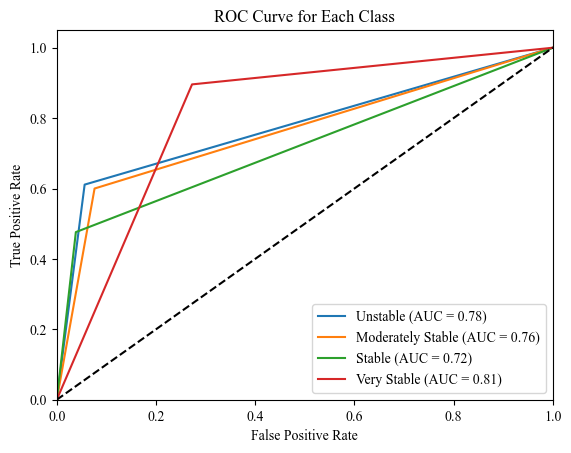

                   Sensitivity  Specificity       MCC       AUC  Accuracy
Unstable              0.611111     0.943820  0.610647  0.777466     0.848
Moderately Stable     0.600000     0.923810  0.523810  0.761905     0.872
Stable                0.476190     0.961538  0.518927  0.718864     0.880
Very Stable           0.895833     0.727273  0.606280  0.811553     0.792
ROC Curve plot saved as roc_curve_plot_stability.png
Classification metrics saved as classification_metrics_stability_v2.csv


In [174]:
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix, matthews_corrcoef, accuracy_score
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import label_binarize


# Assuming y_test and y_pred are already defined
# Binarize the output labels for multiclass ROC curve
y_test_binarized = label_binarize(y_test, classes=[1, 2, 3, 4])
y_pred_binarized = label_binarize(y_pred.values, classes=[1, 2, 3, 4])

# Define the class labels
label_names = ['Unstable', 'Moderately Stable', 'Stable', 'Very Stable']

# Initialize dictionary to store the results
results = {}

# Compute metrics for each class
for i in range(y_test_binarized.shape[1]):
    # Sensitivity (Recall) and Specificity
    cm = confusion_matrix(y_test_binarized[:, i], y_pred_binarized[:, i])
    tn, fp, fn, tp = cm.ravel() if cm.size == 4 else (0, 0, 0, 0)
    
    sensitivity = tp / (tp + fn) if (tp + fn) > 0 else 0
    specificity = tn / (tn + fp) if (tn + fp) > 0 else 0
    
    # MCC
    mcc = matthews_corrcoef(y_test_binarized[:, i], y_pred_binarized[:, i])
    
    # AUC
    auc_score = roc_auc_score(y_test_binarized[:, i], y_pred_binarized[:, i])
    
    # Accuracy
    accuracy = accuracy_score(y_test_binarized[:, i], y_pred_binarized[:, i])
    
    # Store results
    results[label_names[i]] = {
        'Sensitivity': sensitivity,
        'Specificity': specificity,
        'MCC': mcc,
        'AUC': auc_score,
        'Accuracy': accuracy
    }
    
    # Plot ROC curve
    fpr, tpr, _ = roc_curve(y_test_binarized[:, i], y_pred_binarized[:, i])
    plt.plot(fpr, tpr, label=f'{label_names[i]} (AUC = {auc_score:.2f})')

# Plot the random chance line
plt.plot([0, 1], [0, 1], 'k--')

# Set the limits for x and y axis
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

# Set the labels and title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Each Class')

# Add a legend
plt.legend(loc="lower right")

# Save the plot as an image file
plot_filename = 'roc_curve_plot_stability.png'
plt.savefig(plot_filename, bbox_inches='tight')

# Display the plot
plt.show()

# Convert results to DataFrame for better formatting
results_df = pd.DataFrame(results).T
print(results_df)

# Save the results to a CSV file
results_filename = 'classification_metrics_stability_v2.csv'
results_df.to_csv(results_filename, index=True)

print(f"ROC Curve plot saved as {plot_filename}")
print(f"Classification metrics saved as {results_filename}")


In [176]:
# Classification Report
classification_rep_test = classification_report(y_test, y_pred)
print("Classification Report on Test:")
print(classification_rep_test)


Classification Report on Test:
              precision    recall  f1-score   support

           1       0.81      0.61      0.70        36
           2       0.60      0.60      0.60        20
           3       0.71      0.48      0.57        21
           4       0.67      0.90      0.77        48

    accuracy                           0.70       125
   macro avg       0.70      0.65      0.66       125
weighted avg       0.71      0.70      0.69       125



In [177]:
y_prob_test = predictor.predict_proba(model="ExtraTrees_r172_BAG_L1", data=test_df)

In [178]:
y_prob_test

,1,2,3,4
298,0.193075,0.098105,0.102319,0.606501
523,0.387673,0.137283,0.264583,0.210461
502,0.208746,0.000000,0.010635,0.780619
370,0.348685,0.005494,0.210239,0.435581
558,0.449342,0.001587,0.493433,0.055638
...,...,...,...,...
556,0.449342,0.001587,0.493433,0.055638
438,0.457853,0.002226,0.027935,0.511986
314,0.381045,0.150597,0.075353,0.393004
138,0.001377,0.643528,0.248414,0.106681


In [179]:
mat

array([[0.61111111, 0.        , 0.11111111, 0.27777778],
       [0.1       , 0.6       , 0.        , 0.3       ],
       [0.0952381 , 0.19047619, 0.47619048, 0.23809524],
       [0.02083333, 0.08333333, 0.        , 0.89583333]])

In [180]:
cm = confusion_matrix(y_test, y_pred.values)

In [181]:
total = cm.sum(axis=1)

In [182]:
total

array([36, 20, 21, 48], dtype=int64)

In [183]:
cm_n = mat/total

In [184]:
mat

array([[0.61111111, 0.        , 0.11111111, 0.27777778],
       [0.1       , 0.6       , 0.        , 0.3       ],
       [0.0952381 , 0.19047619, 0.47619048, 0.23809524],
       [0.02083333, 0.08333333, 0.        , 0.89583333]])

In [185]:
rdf = pd.DataFrame(data=cm_n)

In [157]:
rdf

,0,1,2,3
0,0.016975,0.000000,0.005291,0.005787
1,0.002778,0.030000,0.000000,0.006250
2,0.002646,0.009524,0.022676,0.004960
3,0.000579,0.004167,0.000000,0.018663


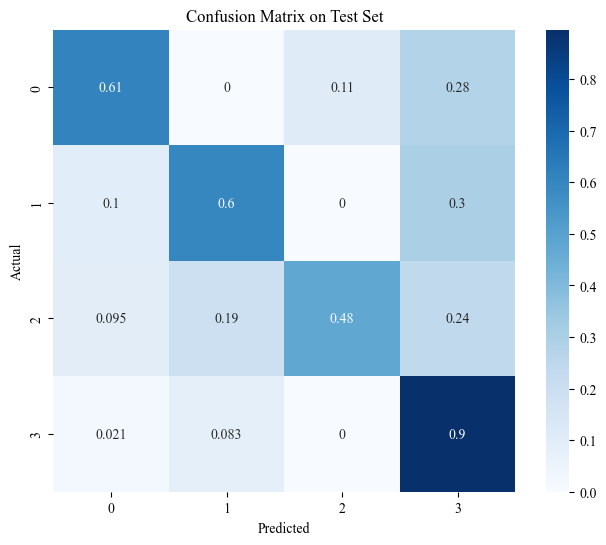

In [186]:
# Set the font properties
plt.rcParams['font.family'] = 'Times New Roman'
# Save Confusion Matrix plot
fig, ax = plt.subplots(figsize=(8, 6), dpi=100)
sns.heatmap(mat, annot=True, fmt=".2g", cmap="Blues", square=True, ax=ax)
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
ax.set_title('Confusion Matrix on Test Set')
plt.show()

In [187]:
mat = confusion_matrix(y_test, y_pred.values,normalize='true')

In [188]:
mat

array([[0.61111111, 0.        , 0.11111111, 0.27777778],
       [0.1       , 0.6       , 0.        , 0.3       ],
       [0.0952381 , 0.19047619, 0.47619048, 0.23809524],
       [0.02083333, 0.08333333, 0.        , 0.89583333]])

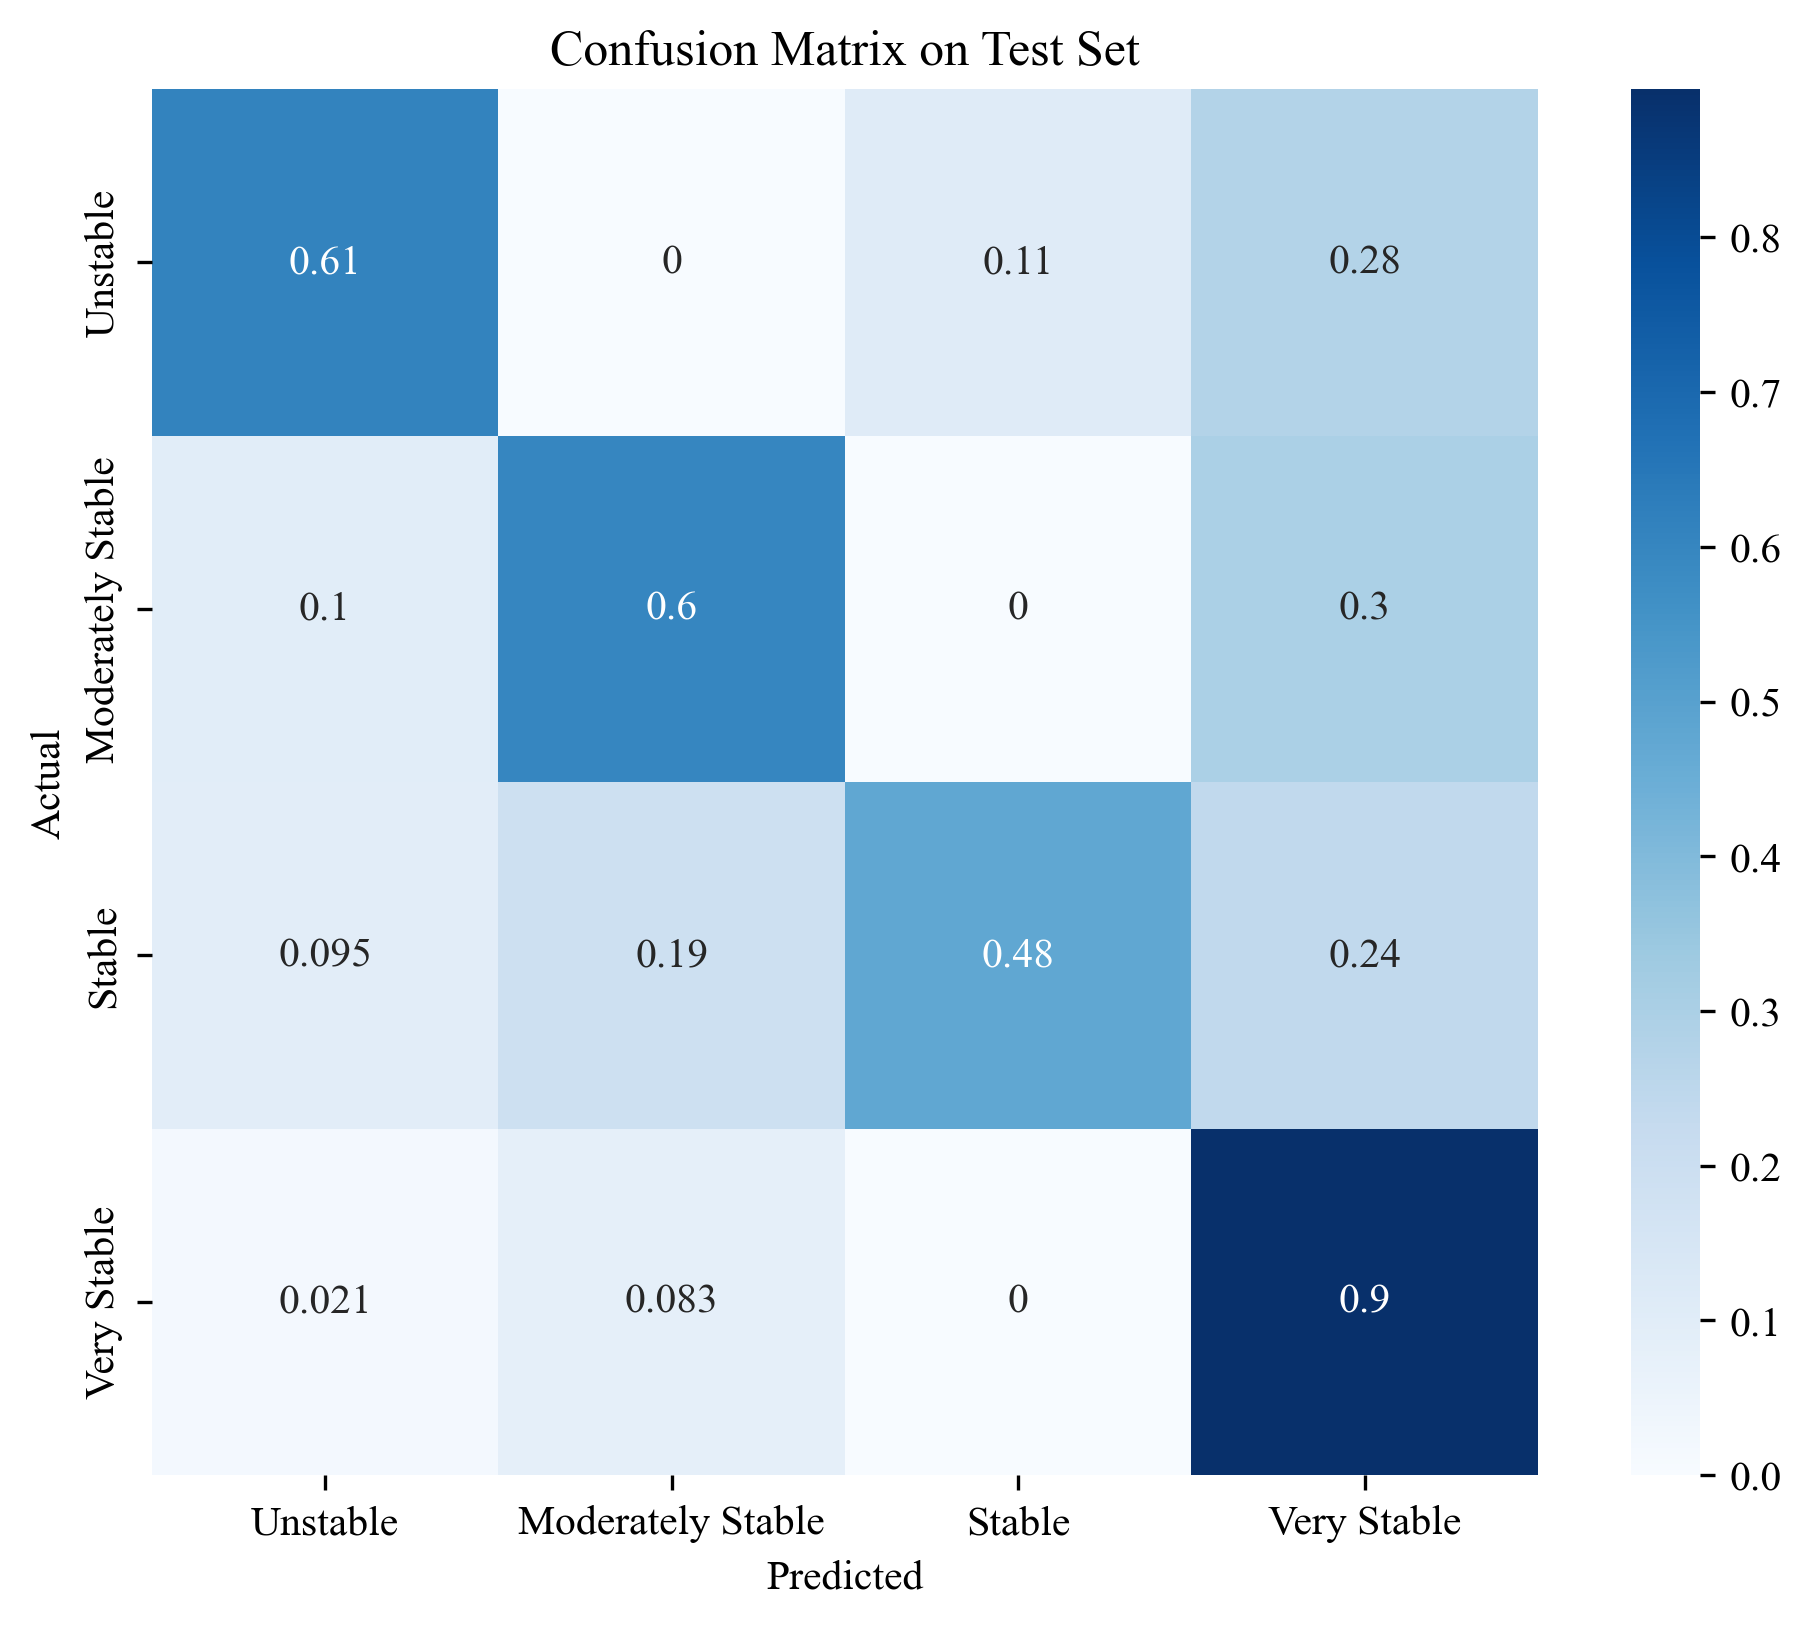

In [189]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your confusion matrix is stored in 'mat'
label_names = ['Unstable', 'Moderately Stable', 'Stable', 'Very Stable']

# Set the font properties
plt.rcParams['font.family'] = 'Times New Roman'

# Plot the heatmap with class names
fig, ax = plt.subplots(figsize=(8, 6), dpi=300)
sns.heatmap(mat, annot=True, fmt=".2g", cmap="Blues", square=True, ax=ax, 
            xticklabels=label_names, yticklabels=label_names)

# Set the labels and title
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
ax.set_title('Confusion Matrix on Test Set')

# Save the plot before showing it
plt.savefig('confusion_matrix_with_labels.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()
